In [35]:
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#Data Collection

dataset = pd.read_csv("KNN.csv")

In [36]:
data=dataset.copy()

In [37]:


#Data Understanding

dataset.info()

dataset.describe()

dataset.isnull()

dataset.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

radius_mean
parameter_mean 
area_mean
radius_worst
parameter_worst
area_worst

In [38]:

#Data Pre-Processing

df=data[['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst', 'diagnosis']]

In [39]:
df.corr().style.background_gradient(cmap='coolwarm')

,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst
radius_mean,1.000000,0.997855,0.987357,0.969539,0.965137,0.941082
perimeter_mean,0.997855,1.000000,0.986507,0.969476,0.970387,0.941550
area_mean,0.987357,0.986507,1.000000,0.962746,0.959120,0.959213
radius_worst,0.969539,0.969476,0.962746,1.000000,0.993708,0.984015
perimeter_worst,0.965137,0.970387,0.959120,0.993708,1.000000,0.977578
area_worst,0.941082,0.941550,0.959213,0.984015,0.977578,1.000000


In [40]:
df.isna().sum()*100

radius_mean        0
perimeter_mean     0
area_mean          0
radius_worst       0
perimeter_worst    0
area_worst         0
diagnosis          0
dtype: int64


from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder() 

y1 = enc.fit_transform(df['diagnosis'])

In [41]:
df['diagnosis'].replace({'B': 0, 'M': 1},inplace=True)


D:\anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
df.head(20)

,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst,diagnosis
0,17.99,122.80,1001.0,25.38,184.60,2019.0,1
1,20.57,132.90,1326.0,24.99,158.80,1956.0,1
2,19.69,130.00,1203.0,23.57,152.50,1709.0,1
3,11.42,77.58,386.1,14.91,98.87,567.7,1
4,20.29,135.10,1297.0,22.54,152.20,1575.0,1
5,12.45,82.57,477.1,15.47,103.40,741.6,1
6,18.25,119.60,1040.0,22.88,153.20,1606.0,1
7,13.71,90.20,577.9,17.06,110.60,897.0,1
8,13.00,87.50,519.8,15.49,106.20,739.3,1
9,12.46,83.97,475.9,15.09,97.65,711.4,1


In [43]:
df['radius_worst'].ndim

1

In [44]:
dd=df.copy()

In [45]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [46]:
X = dd.iloc[:, :-1]

y = dd.iloc[:, -1]


from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder() 

y1 = enc.fit_transform(df['diagnosis'])

In [47]:
df.isnull().values.any()

False

In [48]:
df.isnull().sum().sum()

0

In [49]:
df.isna().all()

radius_mean        False
perimeter_mean     False
area_mean          False
radius_worst       False
perimeter_worst    False
area_worst         False
diagnosis          False
dtype: bool

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 6)
(171, 6)
(398,)
(171,)


In [52]:
from sklearn.linear_model import LogisticRegression
#import lasso ridge and elasticnet
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lr=LogisticRegression(random_state=1,class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=1)

In [53]:
y_pred=lr.predict(X_test)

In [54]:
ytr=lr.predict(X_train)

In [55]:
#train accurancy
from sklearn.metrics import accuracy_score
#import mse ,rmse,mae,r2_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc,precision_recall_curve,average_precision_score,precision_score,recall_score,f1_score,matthews_corrcoef,cohen_kappa_score,log_loss,brier_score_loss,precision_recall_fscore_support,classification_report,precision_recall_curve,roc_auc_score,roc_curve,auc,precision_recall_curve,average_precision_score,precision_score,recall_score,f1_score,matthews_corrcoef,cohen_kappa_score,log_loss,brier_score_loss,precision_recall_fscore_support
#import confusion_matrix from 
#import classification_report  from 
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
classs=classification_report(y_test,y_pred)

print(classs)
confusion=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

<function confusion_matrix at 0x0000024417D4C9D0>


In [57]:
#check train accurency


In [58]:
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [59]:
print(accuracy_score(y_train,ytr))

0.9271356783919598


In [60]:
# summarize the fit of the model
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]


In [66]:
import pickle
pickle.dump(lr, open('model.pkl','wb'))


In [67]:
appp=pickle.load(open('model.pkl','rb'))

In [63]:
[['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst', 'diagnosis']]

[['radius_mean',
  'perimeter_mean',
  'area_mean',
  'radius_worst',
  'perimeter_worst',
  'area_worst',
  'diagnosis']]

In [64]:
[19.81,130,1260,27,2,186.6,2398]

[19.81, 130, 1260, 27, 2, 186.6, 2398]

In [68]:
import numpy as np

In [71]:
# predictive system 
def gym_app():
  #age = input("Your Age: ")
  #height = input("Your height in feet: ")
  #weight = input("Your weight in pounds: ")
  input_data = np.asarray([19.81,130,1260,27,186.6,2398])
  input_data = input_data.reshape(1,-1)
  #prediction  = sv_classifier.predict(input_data)
  prediction2 = appp.predict(input_data)
  print(f"logistic regressor: {prediction2[0]}")

In [72]:
gym_app()

logistic regressor: 1


In [94]:
#polt auc ruc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ns_auc = roc_auc_score(y_test,y_pred)
#lr_auc = roc_auc_score(testy, lr_probs)

In [95]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
#print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.959


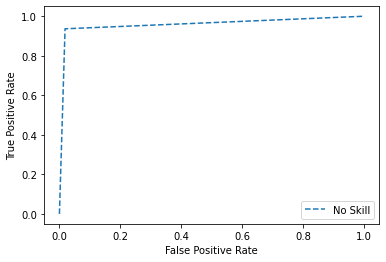

In [97]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test,y_pred)
#lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
#import pyplot
from matplotlib import pyplot
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [101]:
auc = roc_auc_score(y_pred,y_test)
print('AUC: %.3f' % auc)

AUC: 0.965


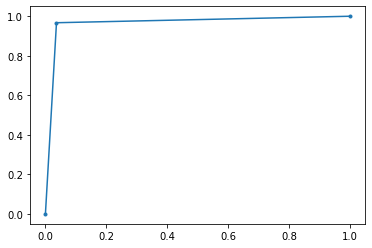

In [103]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_pred,y_test)
plt.plot(fpr, tpr, marker='.')


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()